The perceptron model takes the input x if the weighted sum of the inputs is greater than threshold b output will be 1 else output will be 0.

![title](perceptron1.png)

## Algorithm

![title](perceptron2.png)

## Data Preparation

In [1]:
#import packages
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load the breast cancer data
breast_cancer = sklearn.datasets.load_breast_cancer()

#convert the data to pandas dataframe.
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


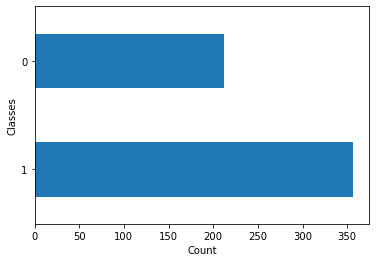

In [4]:
#plotting a graph to see class imbalance
data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
#perform scaling on the data.
X = data.drop("class", axis = 1)
Y = data["class"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)

#train test split.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)

# Perceptron

In [11]:
class my_Perceptron:
    def __init__(self, epochs = 5000):
        self.epochs = epochs
#         self.lr = lr
        pass
    
    def fit(self, X, Y):
        self.X = X.to_numpy()
        self.Y = Y.to_numpy()
        
        self.X = np.insert(self.X, 0, 1.0, axis=1)   # adding bias directly to X as a column of 1's
        self.weights = np.random.uniform(low = -2, high = 2, size=self.X.shape[1]) # generating inital weights in range (-2, 2)
        
        for epoch in range(self.epochs):
            rand_k = np.random.randint(0,self.Y.shape[0])
            x = self.X[rand_k]
            y_pred = 0
            
            if np.dot(x, self.weights) > 0:
                y_pred = 1
            else:
                y_pred = 0
            
#             self.weights += self.lr * (self.Y[rand_k] - y_pred) * x
            self.weights += (self.Y[rand_k] - y_pred) * x
        pass

    def predict(self, X_test):
        Xx_test = X_test.to_numpy()
        Xx_test = np.insert(Xx_test, 0, 1.0, axis=1)
        
        Y_pred = []
        
        for x in Xx_test:
            if np.dot(x, self.weights) > 0:
                Y_pred.append(1)
            else:
                Y_pred.append(0)
        return np.array(Y_pred)

In [13]:
from sklearn.metrics import accuracy_score

my_perceptron = my_Perceptron()
my_perceptron.fit(X_train, Y_train)
my_pred = my_perceptron.predict(X_test)

accuracy_score(Y_test, my_pred)

0.9649122807017544

In [22]:
# interestingly, here we might get different scores like 0.92, 0.96 and even 0.98 obviously depending on the choice of initial weights and randomly choosen datapoints

In [14]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

sklearn_perceptron = Perceptron(tol=1e-1, random_state=0)
sklearn_perceptron.fit(X_train, Y_train)
sklearn_pred = sklearn_perceptron.predict(X_test)

accuracy_score(Y_test, sklearn_pred)

0.9473684210526315

In [15]:
sklearn_perceptron = Perceptron(tol=1e-2, random_state=0)
sklearn_perceptron.fit(X_train, Y_train)
sklearn_pred = sklearn_perceptron.predict(X_test)

accuracy_score(Y_test, sklearn_pred)

0.9649122807017544

# Translate a logistic regression task to tensorflow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

data = pd.read_csv('classification.csv')

y = data['default']

# some preprocessing
x1 = pd.get_dummies(data[['ed']]) 
x2 = data.drop(['ed', 'age', 'address', 'income'], axis = 1)

X = pd.concat([x1, x2], axis = 1)
X = X.drop(['ed_high school', 'ed_postgraduate'], axis = 1)
X['add_feature_1'] = X.debtinc * X.creddebt
X = X.drop(['default'], axis = 1)

#finally, 
# y = tf.one_hot(y, depth=len(np.unique(y)))

X, y = np.array(X, np.float32), np.array(y, np.float32)
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

input_shape = X.shape[0]

In [2]:
batch_size = 16
nr_samples = X_train.shape[0]
train_dataset = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train)).shuffle(nr_samples).batch(batch_size)
next(iter(train_dataset))

test_dataset = tf.data.Dataset.from_tensor_slices(
    (X_test, y_test))

In [3]:
# defining the model, one layer just with sigmoid activation
def get_logistic_regression_model():
  return tf.keras.Sequential(
      [tf.keras.layers.Dense(1,activation='sigmoid')])

# defining the needed loss
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# defining the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# making a minibatch SGD training
nr_epochs = 100
losses, weights, biases = [], [], []
logistic_regression = get_logistic_regression_model()
for epoch in range(nr_epochs):
  for batch_x, batch_y in train_dataset:
    with tf.GradientTape() as tape:
      # Compute current loss.
      l = loss(logistic_regression(batch_x, training=True), batch_y)
      # Calculate the gradient with respect to trainable variables (w and b).
      grads = tape.gradient(l, logistic_regression.trainable_variables)
      # Apply the gradient step (learning rate is part of the optimizer).
      optimizer.apply_gradients(
          zip(grads, logistic_regression.trainable_variables))
  # At the end of the epoch, compute thes loss on the whole dataset.
  losses.append(loss(logistic_regression(X), tf.convert_to_tensor(y)))
  w, b = logistic_regression.get_weights()
#   print(f'epoch {epoch + 1}, loss {losses[-1]:f}, w: {w}, b: {b}')
  weights.append(w)
  biases.append(b)

In [4]:
y_proba = logistic_regression(X_test)
y_pred=np.zeros(X_test.shape[0])

for i in range(len(y_proba)):
    
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# as of class imbalance seems that this is not a bad result at all 

0.7357142857142858